In [1]:
#import necessary libraries
import traceback
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, RationalQuadratic, Exponentiation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import layers
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem

**The Data**

In [2]:
# import data as a pandas dataframe
df = pd.read_csv (r'C:\Users\Ama\OneDrive - Southern University System\02-MachineLearning\Dataset_for_practise\SMP-Eg - Copy.csv')
#df = pd.read_csv(r"C:\Users\Ama\OneDrive - Southern University System\02-MachineLearning\Dataset_for_practise\SMP-Eg.csv")

In [3]:
# getting data into appropriate shape
smiles = df['SMILES']
smiles = [list(smile.strip('{} ').split(',')) for smile in smiles]

molar_ratio = df['Molar Ratio']
m_r = []
for entry in molar_ratio:
    ratio_list = [float(x) for x in entry.split(':')]
    m_r.append(ratio_list)

In [4]:
''''
functions for fingerprinting and multiplication of 
fingerprinted monomers by their respective molar ratios
'''
#function for fingerprinting
def fingerprint_monomer(monomer):
    mol = Chem.MolFromSmiles(monomer)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 10, 128)
    return fp

#function for storing fingerprints monomers as a representation of the polymers
def fingerprint_polymer(polymer):
    polymer_fp = []
    for monomer in polymer:
        monomer_fp = fingerprint_monomer(monomer)
        polymer_fp.append(monomer_fp)
    return polymer_fp

# function for multiplication by their respective molar ratios
def multiply_fingerprint(fp, m_r_value):
    return np.multiply(fp, m_r_value)

fingerprinted_polymer_data = []
for polymer, polymer_m_r in zip(smiles, m_r):
    fingerprinted_polymer = fingerprint_polymer(polymer)
    multiplied_polymer = [multiply_fingerprint(fp, m_r_value) for fp, m_r_value in zip(fingerprinted_polymer, polymer_m_r)]
    fingerprinted_polymer_data.append(multiplied_polymer)
    

#flatten the array created and storing them in a list
flattened_arr = [np.concatenate(arr) for arr in fingerprinted_polymer_data]

#find the maximum length of the flattened arrays
max_length = max(len(arr) for arr in flattened_arr)

# pad the arrays with zeros to make them the same length
padded_arrays = [np.pad(arr, (0, max_length - len(arr)), mode = 'constant') for arr in flattened_arr]

new_array = np.stack(padded_arrays)

In [5]:
X = new_array
y = df['Glassy Modulus'] #specify y

In [6]:
#Split data into training and testing sets
random_seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= random_seed)

**THE MODELS**

In [7]:
x_plot = np.linspace(0, 14)
y_plot = x_plot

SVR

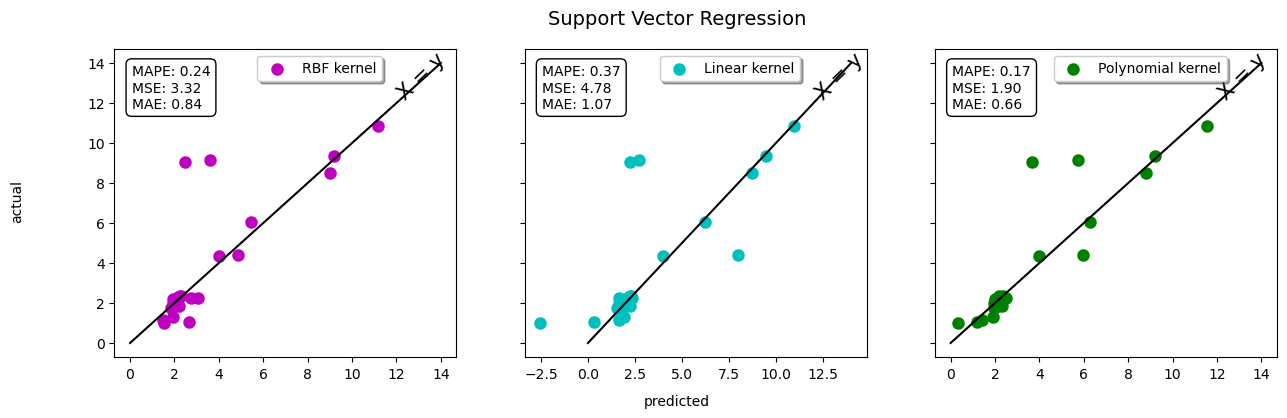

In [8]:
svr_rbf = SVR(kernel="rbf", C=100, gamma='scale', epsilon=0.2)
svr_lin = SVR(kernel="linear", C=100, gamma="scale", epsilon=0.2)
svr_poly = SVR(kernel="poly", C=100, gamma="scale", degree=3, epsilon=0.2, coef0=1)

lw = 3

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)
for ix, svr in enumerate(svrs):
    predicted_values = svr.fit(X_train, y_train).predict(X_test)
    axes[ix].scatter(
        predicted_values,
        y_test,
        color=model_color[ix],
        lw=lw,
        label="{} kernel".format(kernel_label[ix]),
    )
    axes[ix].plot(
        x_plot,
        y_plot, color = 'black'
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.6, 1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )
    # Calculate the MAPE
    mape = mean_absolute_percentage_error(y_test, predicted_values)
    mse = mean_squared_error(y_test, predicted_values)
    mae = mean_absolute_error(y_test, predicted_values)

    # Display the MAE as text annotation on the plot
    axes[ix].text(
        0.05,
        0.95,
        f"MAPE: {mape:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}",
        transform=axes[ix].transAxes,
        ha="left",
        va="top",
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
    )
    axes[ix].text(
    11.9,
    12,
    "X = y",
    rotation=44,
    fontsize = 15,
    verticalalignment='bottom',
    )
 
fig.text(0.5, 0.0, "predicted", ha="center", va="center")
fig.text(0.06, 0.5, "actual", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

ANN

Epoch 1/1000
7/7 [==============================] - 13s 369ms/step - loss: 3.9173 - mape: 90.4977 - val_loss: 3.2349 - val_mape: 74.9910
Epoch 2/1000
7/7 [==============================] - 0s 57ms/step - loss: 3.0579 - mape: 64.8521 - val_loss: 2.2860 - val_mape: 45.5315
Epoch 3/1000
7/7 [==============================] - 0s 42ms/step - loss: 2.7159 - mape: 85.8434 - val_loss: 2.3328 - val_mape: 58.4733
Epoch 4/1000
7/7 [==============================] - 0s 74ms/step - loss: 2.5501 - mape: 72.8527 - val_loss: 2.1304 - val_mape: 40.6532
Epoch 5/1000
7/7 [==============================] - 0s 53ms/step - loss: 2.4341 - mape: 57.6588 - val_loss: 2.0357 - val_mape: 43.4447
Epoch 6/1000
7/7 [==============================] - 0s 59ms/step - loss: 2.2793 - mape: 62.2254 - val_loss: 1.9540 - val_mape: 43.9933
Epoch 7/1000
7/7 [==============================] - 0s 45ms/step - loss: 2.1180 - mape: 50.9928 - val_loss: 1.9257 - val_mape: 43.9508
Epoch 8/1000
7/7 [==============================] - 0

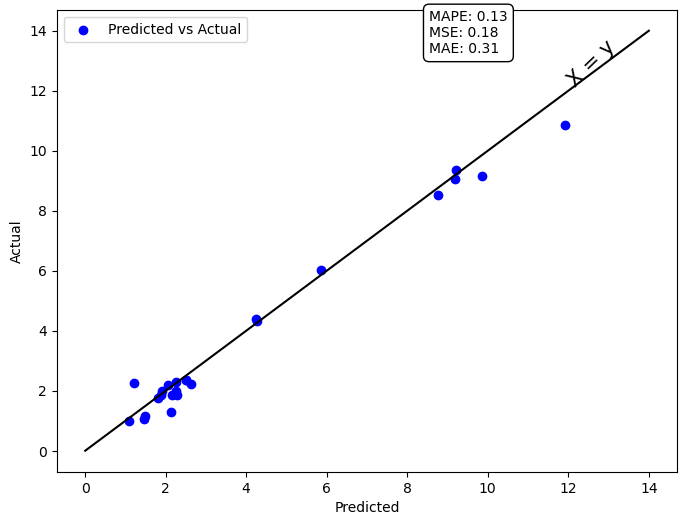

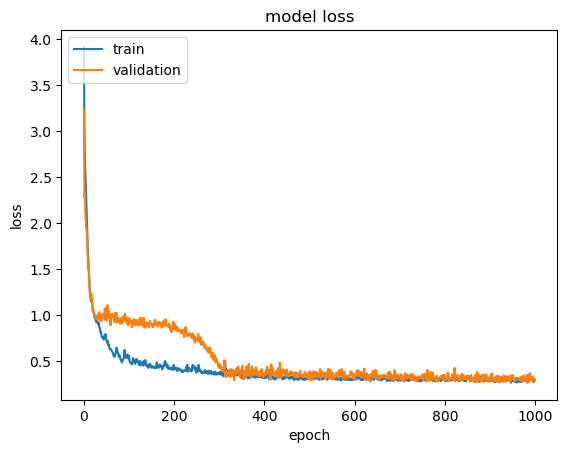

In [9]:
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# Define the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss='mae',optimizer=optimizer, metrics=['mape'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000,  batch_size= 32, validation_data=(X_test, y_test))
# Predict on the test set
predicted_values = model.predict(X_test)

# Calculate the error
mape = mean_absolute_percentage_error(y_test, predicted_values)
mse = mean_squared_error(y_test, predicted_values)
mae = mean_absolute_error(y_test, predicted_values)

# Plotting
lw = 1

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    predicted_values,
    y_test,
    color='b',
    lw=lw,
    label="Predicted vs Actual"
)
ax.plot(
    x_plot,
    y_plot,
    color='black'
)

# Display the MAE as text annotation on the plot
ax.text(
    0.6,
    1,
    f"MAPE: {mape:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}",
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
)
ax.text(
    11.9,
    12,
    "X = y",
    rotation=44,
    fontsize = 15,
    verticalalignment='bottom',
    )

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.legend()

plt.show()


#mape, mae = model.evaluate(X_test, y_test)
#print('Test Mean Absolute Error:', mape)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45,377
Trainable params: 45,377
Non-trainable params: 0
_________________________________________________________________


GPR

GaussianProcessRegressor(alpha=1.0, kernel=1**2 * Matern(length_scale=1, nu=2),
                         random_state=10)


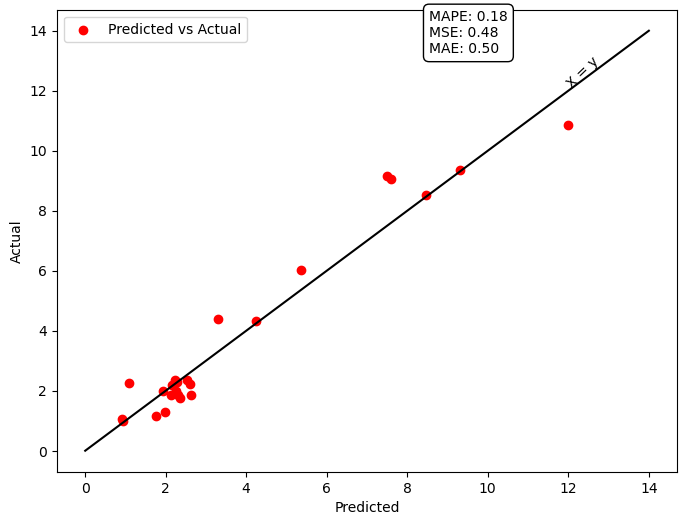

In [11]:
# Define the list of kernels to evaluate
kernels = [
    1.0 * RBF(length_scale=1.0),
    1.0 * Matern(length_scale=1.0, nu=2.0),
    1.0 * RationalQuadratic(length_scale=2.0),
    1.0 * DotProduct(sigma_0=2.0, sigma_0_bounds=(1e-6, np.inf)),
    1.0 * Exponentiation(kernel= RBF(), exponent=2)
]

# Initialize lists to store AIC and models
aic_scores = []
models = []

# Perform GPR with different kernels and calculate AIC scores
for kernel in kernels:
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1.0, random_state = 10)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    n_params = len(gpr.kernel.theta)
    aic = 2 * n_params + len(X_train) * np.log(mape)
    aic_scores.append(aic)
    models.append(gpr)

# Find the model with the minimum AIC score
best_model_idx = np.argmin(aic_scores)
best_model = models[best_model_idx]

# Fit the best model to the entire dataset
best_model.fit(X_train, y_train)
print(best_model)

# Perform prediction with the best model
y_pred = best_model.predict(X_test)


# Calculate the error
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plotting
lw = 1

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    y_pred,
    y_test,
    color='r',
    lw=lw,
    label="Predicted vs Actual"
)
ax.plot(
    x_plot,
    y_plot,
    color='black'
)

# Display the MAE as text annotation on the plot
ax.text(
    0.6,
    1,
    f"MAPE: {mape:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}",
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
)
ax.text(
    11.9,
    12,
    "X = y",
    rotation=44,
    fontsize = 10,
    verticalalignment='bottom',
    )
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.legend()

plt.show()